# import Libraries
pandas: for data reading and preprocessing<br>
tensorflow: for neural network construction<br>
sklearn.preprocessing: for data encoding<br>
sklearn.model_selection: it has convenient method for training/test data spliting<br>
matplotlib.pyplot: to plot performance of the training process.<br>

In [117]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Read Dataset

In [408]:
dataset = pd.read_csv('feature selection2.csv', index_col=False)

In [409]:
print(dataset.head())

   venuename  racedistance  horseid1  row1  trainer1  driver1  handicap1  \
0         28          1755    775781     5      2006     1741          0   
1         51          2147    778059     5      1277      848          0   
2         28          2160    786617     1      1171      807          0   
3         51          1758    761333     3      2610     1957          0   
4         28          2160    782182     6      2850     1981          0   

   age1  horseid2  row2  ...  place10  place11  place12  place13  place14  \
0     5    785411     4  ...        8        0        0        0        0   
1     5    792058    14  ...        2        0        0        0        0   
2     4    782699    11  ...        8        0        0        0        0   
3     7    779988     5  ...        0        0        0        0        0   
4     4    782190     3  ...        3        0        0        0        0   

   place15  place16  place17  place18  place19  
0        0        0        0   

# Prepare training/test data

Select right columns for X, y<br>
<ul>
    <li> select all the data except last 19 columns, because last 19 columns are is about 'place'</li>
    <li> Select last 19 columns for y</li>
</ul>
Split data into train/test sets
<ul>
    <li>80% for training</li>
    <li>20% for testing(validation)</li>
</ul>

In [410]:
X = dataset[dataset.columns[:-19]]
y = dataset[dataset.columns[-19:]]

In [411]:
print(X.head())

   venuename  racedistance  horseid1  row1  trainer1  driver1  handicap1  \
0         28          1755    775781     5      2006     1741          0   
1         51          2147    778059     5      1277      848          0   
2         28          2160    786617     1      1171      807          0   
3         51          1758    761333     3      2610     1957          0   
4         28          2160    782182     6      2850     1981          0   

   age1  horseid2  row2  ...  trainer18  driver18  handicap18  age18  \
0     5    785411     4  ...          0         0           0      0   
1     5    792058    14  ...          0         0           0      0   
2     4    782699    11  ...          0         0           0      0   
3     7    779988     5  ...          0         0           0      0   
4     4    782190     3  ...          0         0           0      0   

   horseid19  row19  trainer19  driver19  handicap19  age19  
0          0      0          0         0        

In [412]:
y = dataset[dataset.columns[-19:]].applymap(lambda x: 1.0 if 0.5 < x < 1.5 else 0.0)

In [413]:
print(y)

       place1  place2  place3  place4  place5  place6  place7  place8  place9  \
0         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     0.0   
3         0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
66796     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
66797     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
66798     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
66799     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
66800     1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       place10  place11  pl

In [414]:
ss = preprocessing.StandardScaler()
X = pd.DataFrame(ss.fit_transform(X),columns = X.columns)


In [669]:
import pickle
with open("StandardScaler.pkl", 'wb') as scaler_file:
    pickle.dump(ss, scaler_file)
    scaler_file.close()

In [415]:
print(X.head())

   venuename  racedistance  horseid1      row1  trainer1   driver1  handicap1  \
0  -0.622760     -0.751011  0.133480 -0.343513  0.371096  0.706278  -0.180155   
1   0.237397      0.706270  0.154066 -0.343513 -0.381683 -0.531106  -0.180155   
2  -0.622760      0.754599  0.231404 -1.373611 -0.491141 -0.587918  -0.180155   
3   0.237397     -0.739858  0.002915 -0.858562  0.994798  1.005578  -0.180155   
4  -0.622760      0.754599  0.191325 -0.085988  1.242626  1.038834  -0.180155   

       age1  horseid2      row2  ...  trainer18  driver18  handicap18  age18  \
0 -0.222413  0.222702 -0.597071  ...        0.0       0.0         0.0    0.0   
1 -0.222413  0.281759  1.983426  ...        0.0       0.0         0.0    0.0   
2 -0.698612  0.198607  1.209277  ...        0.0       0.0         0.0    0.0   
3  0.729985  0.174520 -0.339021  ...        0.0       0.0         0.0    0.0   
4 -0.698612  0.194084 -0.855121  ...        0.0       0.0         0.0    0.0   

   horseid19  row19  trainer19  

In [416]:
X = X.to_numpy()
print(X)

[[-0.62276015 -0.75101089  0.13348012 ...  0.          0.
   0.        ]
 [ 0.23739749  0.70627035  0.15406613 ...  0.          0.
   0.        ]
 [-0.62276015  0.75459856  0.23140373 ...  0.          0.
   0.        ]
 ...
 [-1.40812147 -0.84394975  0.44689712 ...  0.          0.
   0.        ]
 [ 0.19999933 -1.02982746  0.29055914 ...  0.          0.
   0.        ]
 [ 0.19999933  0.90330073  0.3709512  ...  0.          0.
   0.        ]]


In [417]:
y = y.to_numpy()

In [418]:
print(X.shape)
print(y.shape)

# split data into train and test sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1)

(66801, 116)
(66801, 19)


In [419]:
print(X_train.shape)

(53440, 116)


# Build the model
Use keras to build the model with easy-to-use api Sequential<br>
Have to mention that input layer has 116 inputs. The calculation is following:
<ul>
    <li>2 features from race data - venuename, racedistance</li>
    <li>19 horses has 6 features - horseid,row, trainer, driver, handicap, age</li>
</ul>
Output layer has 19 nodes

In [588]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(19))
# initialize the optimizer
opt = Adam(lr=0.00001)
# opt = SGD(lr=0.01, nesterov=True, momentum=0.9)
# Compile model
model.compile(loss='mse', optimizer=opt)

In [589]:
print(model.summary())

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_198 (Dense)            (None, 128)               14976     
_________________________________________________________________
dropout_110 (Dropout)        (None, 128)               0         
_________________________________________________________________
dense_199 (Dense)            (None, 256)               33024     
_________________________________________________________________
dropout_111 (Dropout)        (None, 256)               0         
_________________________________________________________________
dense_200 (Dense)            (None, 512)               131584    
_________________________________________________________________
dropout_112 (Dropout)        (None, 512)               0         
_________________________________________________________________
dense_201 (Dense)            (None, 256)             

# Train the model


In [590]:
from datetime import datetime
cur_date_time = datetime.strftime(datetime.now(), '%Y%m%d-%H-%M')
model_weight_name = 'model-128-256-512-256-128-64-19(all relu)-' + cur_date_time + '-' + 'epoch={epoch:02d}-val_loss={val_loss:.6f}.hdf5'
model_structure_name = 'model-128-256-512-256-128-64-19(all relu)-' + cur_date_time + '.json'
print(model_weight_name)

model-128-256-128-64-19(all relu)-20210112-23-21-epoch={epoch:02d}-val_loss={val_loss:.6f}.hdf5


In [591]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(model_weight_name, monitor='val_loss', mode='min', save_best_only=True, verbose=1)

In [592]:
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=5)
#train model
H = model.fit(X_train, y_train, validation_split=0.2, epochs=200, callbacks=[checkpoint], batch_size=16)

Epoch 1/200
2672/2672 [==============================] - 7s 2ms/step - loss: 0.0505 - val_loss: 0.0475

Epoch 00001: val_loss improved from inf to 0.04750, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=01-val_loss=0.047500.hdf5
Epoch 2/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0477 - val_loss: 0.0472

Epoch 00002: val_loss improved from 0.04750 to 0.04716, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=02-val_loss=0.047165.hdf5
Epoch 3/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0475 - val_loss: 0.0470

Epoch 00003: val_loss improved from 0.04716 to 0.04702, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=03-val_loss=0.047021.hdf5
Epoch 4/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0473 - val_loss: 0.0470

Epoch 00004: val_loss improved from 0.04702 to 0.04697, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=04

2672/2672 [==============================] - 6s 2ms/step - loss: 0.0466 - val_loss: 0.0465

Epoch 00033: val_loss improved from 0.04648 to 0.04646, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=33-val_loss=0.046464.hdf5
Epoch 34/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0466 - val_loss: 0.0465

Epoch 00034: val_loss improved from 0.04646 to 0.04646, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=34-val_loss=0.046459.hdf5
Epoch 35/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0465 - val_loss: 0.0464

Epoch 00035: val_loss improved from 0.04646 to 0.04645, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=35-val_loss=0.046447.hdf5
Epoch 36/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0465 - val_loss: 0.0464

Epoch 00036: val_loss improved from 0.04645 to 0.04644, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=36-val_

2672/2672 [==============================] - 6s 2ms/step - loss: 0.0462 - val_loss: 0.0462

Epoch 00065: val_loss improved from 0.04624 to 0.04624, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=65-val_loss=0.046236.hdf5
Epoch 66/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0462 - val_loss: 0.0462

Epoch 00066: val_loss did not improve from 0.04624
Epoch 67/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0462 - val_loss: 0.0462

Epoch 00067: val_loss improved from 0.04624 to 0.04623, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=67-val_loss=0.046228.hdf5
Epoch 68/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0462 - val_loss: 0.0462

Epoch 00068: val_loss did not improve from 0.04623
Epoch 69/200
2672/2672 [==============================] - 10s 4ms/step - loss: 0.0462 - val_loss: 0.0462

Epoch 00069: val_loss improved from 0.04623 to 0.04622, saving model to model-1

2672/2672 [==============================] - 6s 2ms/step - loss: 0.0458 - val_loss: 0.0461

Epoch 00102: val_loss improved from 0.04612 to 0.04611, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=102-val_loss=0.046112.hdf5
Epoch 103/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0458 - val_loss: 0.0461

Epoch 00103: val_loss did not improve from 0.04611
Epoch 104/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0458 - val_loss: 0.0461

Epoch 00104: val_loss did not improve from 0.04611
Epoch 105/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0458 - val_loss: 0.0461

Epoch 00105: val_loss improved from 0.04611 to 0.04611, saving model to model-128-256-128-64-19(all relu)-20210112-23-21-epoch=105-val_loss=0.046111.hdf5
Epoch 106/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0458 - val_loss: 0.0461

Epoch 00106: val_loss improved from 0.04611 to 0.04610, saving model to mo

2672/2672 [==============================] - 6s 2ms/step - loss: 0.0454 - val_loss: 0.0461

Epoch 00149: val_loss did not improve from 0.04608
Epoch 150/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0455 - val_loss: 0.0461

Epoch 00150: val_loss did not improve from 0.04608
Epoch 151/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0454 - val_loss: 0.0461

Epoch 00151: val_loss did not improve from 0.04608
Epoch 152/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0454 - val_loss: 0.0461

Epoch 00152: val_loss did not improve from 0.04608
Epoch 153/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0455 - val_loss: 0.0461

Epoch 00153: val_loss did not improve from 0.04608
Epoch 154/200
2672/2672 [==============================] - 6s 2ms/step - loss: 0.0453 - val_loss: 0.0461

Epoch 00154: val_loss did not improve from 0.04608
Epoch 155/200
2672/2672 [==============================] - 6s 2ms/step -

In [676]:
model_json = model.to_json()
with open(model_structure_name, 'w') as json_file:
    json_file.write(model_json)

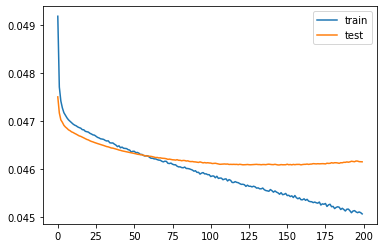

In [593]:
from matplotlib import pyplot
pyplot.plot(H.history['loss'], label='train')
pyplot.plot(H.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [594]:
model.load_weights('model-128-256-128-64-19(all relu)-20210112-23-21-epoch=145-val_loss=0.046082.hdf5')

In [595]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(X_test)

In [674]:
print(test_y_predictions[3])

[ 5.16806468e-02  8.74074772e-02  5.60820140e-02  7.16722161e-02
  1.00819245e-01  1.42781407e-01  1.50891796e-01  5.33846095e-02
  1.15739048e-01  8.20980817e-02  7.41372705e-02  1.56805292e-03
 -5.68106771e-04  1.45630911e-04 -1.30115915e-03  1.80605683e-04
  5.51801350e-05 -1.15769741e-04  1.91019353e-06]


In [675]:
print(y_test[3])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [557]:
print(X_test[-1])

[ 1.09755513e+00  8.66125184e-01 -4.88750868e+00 -8.58561747e-01
  1.36447526e+00 -1.79151218e-01 -1.80154735e-01  1.68238332e+00
  1.71890155e-01 -3.39021264e-01 -9.56531404e-01  1.81445506e+00
 -1.80627250e-01  1.21233640e+00  1.93297828e-01  1.71764176e+00
  1.71436656e+00  8.01389015e-01 -1.81205149e-01 -6.97785005e-01
  9.75335457e-02 -5.98113980e-01  1.47282993e+00  1.22542044e+00
 -1.80863592e-01  2.53682123e-01 -4.44712504e+00  1.45796298e+00
  1.23310281e+00  2.10883995e-01 -1.79272872e-01  2.13793953e+00
  2.57273370e-01  1.87380905e-01  9.40225746e-01  6.37008934e-01
 -1.76834695e-01  1.63853756e+00  3.43870925e-01  3.26749399e-03
  5.81542732e-01 -9.80991632e-01 -1.69398496e-01 -2.51452994e-02
  4.83144470e-01 -9.90683373e-01 -1.95514360e-01 -2.47077327e-01
 -1.55711344e-01  8.85526778e-01  7.64100609e-01  1.40344883e+00
  2.58355672e-01  7.58597614e-01 -1.34805408e-01  7.99445810e-01
  1.15214112e+00  1.07608673e+00  1.48928821e+00  1.58945227e+00
 -1.15349715e-01  1.17339

In [496]:
test_x = pd.read_csv('test.csv', index_col=False)
print(test_x)

   venuename  racedistance  horseid1  row1  trainer1  driver1  handicap1  \
0         51          1758    778426    12      2610     1957          0   

   age1  horseid2  row2  ...  trainer18  driver18  handicap18  age18  \
0     5    774800     1  ...          0         0           0      0   

   horseid19  row19  trainer19  driver19  handicap19  age19  
0          0      0          0         0           0      0  

[1 rows x 116 columns]


In [497]:
print(ss.mean_)

[4.46521609e+01 1.95701747e+03 7.61010399e+05 6.33390219e+00
 1.64662650e+03 1.23129050e+03 8.61184713e-01 5.46705888e+00
 7.60345335e+05 6.31378273e+00 1.65677083e+03 1.22981141e+03
 8.64478077e-01 5.45858595e+00 7.60994383e+05 6.33143216e+00
 1.64785496e+03 1.22964492e+03 8.90196255e-01 5.46321163e+00
 7.59540219e+05 6.32821365e+00 1.63755646e+03 1.22258656e+03
 8.84986752e-01 5.46593614e+00 7.56855158e+05 6.33435128e+00
 1.64349239e+03 1.22370062e+03 8.67277436e-01 5.46078652e+00
 7.43118330e+05 6.25745124e+00 1.60912690e+03 1.20119732e+03
 8.45346627e-01 5.36119220e+00 6.97774492e+05 5.98637745e+00
 1.51635502e+03 1.12677806e+03 7.83640963e-01 5.06285834e+00
 6.13307639e+05 5.42912531e+00 1.33175256e+03 9.88468212e+02
 6.50214817e-01 4.46878041e+00 4.80463055e+05 4.41412554e+00
 1.04241025e+03 7.75821829e+02 4.76729390e-01 3.50490262e+00
 3.29636595e+05 3.12823161e+00 7.09520202e+02 5.30394036e+02
 3.38243439e-01 2.41396087e+00 1.31295773e+05 1.28731606e+00
 2.72832907e+02 2.088910

In [498]:
test_x = pd.DataFrame(ss.transform(test_x),columns = test_x.columns)
test_x = test_x.to_numpy()
print(test_x)

[[ 0.23739749 -0.73985823  0.15738266  1.45915944  0.99479769  1.00557841
  -0.18015474 -0.22241301  0.12842599 -1.37122014 -1.01620075 -0.74757447
  -0.18062725 -0.21876028  0.17749791  1.20249614 -0.42376326 -0.64963316
  -0.18120515 -0.69778501  0.19801485 -0.08431751  1.04848202  1.21438575
  -0.18086359 -0.69632458  0.21810374 -0.3433737  -0.92134098 -0.88687273
  -0.17927287 -0.68802079  0.25528481  0.18738091  1.69372094  1.04464884
  -0.1768347  -0.61293826  0.32304137 -0.47645089  0.81949892  0.15672265
  -0.1693985   0.37488593  0.54836304 -0.54333393 -0.53461626  1.89254489
  -0.15571134 -0.16399905 -1.27407949 -0.94064947 -0.93971469 -0.93838819
  -0.13480541 -1.12299413 -0.85910396 -0.69097056 -0.68460894 -0.68505763
  -0.11534971 -0.78987947 -0.45201652 -0.38595642 -0.37767424 -0.38126456
  -0.087544   -0.4276706  -0.31885354 -0.27633346 -0.26885772 -0.27255677
  -0.06475343 -0.30286726 -0.05916733 -0.04995369 -0.04843171 -0.05281595
  -0.03140546 -0.05758951 -0.04557777 

In [499]:

test_y_predictions1 = model.predict(test_x)

In [500]:
print(test_y_predictions1)

[[ 8.9303121e-02  1.1003609e-01  1.6332324e-01  1.0581966e-01
   1.9294572e-01  8.6525112e-02  8.2212061e-02  1.6142742e-01
  -5.0674453e-03 -1.1402795e-02  5.0340593e-03  4.7499887e-03
  -7.2848960e-04 -2.7186226e-04  3.4712697e-04  8.1820472e-06
   8.6789230e-05 -3.1644327e-04 -9.1524329e-05]]
